In [1]:
import pandas as pd
import re

# # # 텍스트파일 데이터 가져오기#

all.txt - 21년도 의료분야 ai 신규 사업 선정을 위해 135명의 전문가들을 대상으로 수요조사를 실시
- 전문가들은 연구명, 연구내용을 구체적으로 작성(텍스트 형태 - 엑셀)

전처리
- 1. 연구명과 연구내용을 한 셀로 합침
- 2. 여러줄로 구성된 내용을 한 연구에 한줄로 만듬 - clean엑셀함수
- 3. 결과적으로 135줄의 텍스트 파일 생성
- 4. 엑셀로 합친 데이터를 메모장으로 옮김

In [2]:
f=open("all.txt","r",encoding='UTF-8')
lines=f.readlines()
f.close()

In [50]:
####lines[:3]

In [3]:
type(lines)

list

데이터 형태
- 총 135 줄의 1차원 리스트 형태의 데이터 받음

konlpy에서 Hannanum 임포트

dataset = [] 만들고 형태소 분석된 결과를 append

In [4]:
from konlpy.tag import Hannanum
hannanum=Hannanum()

In [5]:
dataset = []

for i in range(len(lines)):
    dataset.append(hannanum.nouns(re.sub('[^가-힣a-zA-Z\s]', '',lines[i])))

In [6]:
###print(dataset[:3])

 * 결과적으로 2차원 형태의 리스트 생성

## ############불용어 제거 ###########ㅁㄴㅇㄹ

In [7]:
stop=['다중','개발','환자','분석','확보','구축','기반','학습','모델','단계','기술','의료','지능','이용','활용','연구','대한','통해','년도','시스템','정보','평가','자료','셋','방법','통한','병원','러닝','기준','형태','경우','파이썬','현황','원인','때문','별로','여러','거나','기구','업그레이드','사용','등','값','분석결과','수집','프로그램','것','수','진행','성능']

* 제거하고 싶은 단어 목록을 stop 리스트에 저장

In [8]:
for i in range(len(dataset)):
    for j in range(len(dataset[i])):
        for k in stop :
            if k in dataset[i]:
                dataset[i].remove(k)

* 형태소 분석한 결과가 2차원 리스트이기 때문에 이중반복문으로 , stop에 포함되는 단어는
* dataset에서 제거

* 제거한 결과

In [9]:
####print(dataset[:3])

# # # # ## # # # ## # # # ## # # # ## # # # #

dataset= 2차원 리스트(데이터셋) , stop=1차원리스트(제거단어목록)

* 불용어 제거 알고리즘 논리 검증

In [12]:
a = [[1,2,3,4],[2,3,4,5],[3,4,5,6]]

In [13]:
b = [2,3]

In [14]:
a

[[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]]

In [15]:
for i in range(len(a)):
    for j in range(len(a[i])):
        for k in b :
            if k in a[i]:
                a[i].remove(k)

for i in range (len(a)):
    for j in range (len(a[i])):
        for k in b:
            if k in a[i]:
                a[i].remove(k)

In [16]:
a

[[1, 4], [4, 5], [4, 5, 6]]

* 불용어 제거 알고리즘 검증 종료


# # # # ## # # # ## # # # ## # # # ## # # # #

In [10]:
type(dataset)

list

분석을 위해서는 데이터 셋의 형태가 list형태여야 한다.

# # # # ## # # # ## # # # ## # # # ## # # # #

데이터 자료형 변경 방법

* kick(리스트) 을 문자열 형태로 바꾸기 위해 str함수 사용

* kick1=str(kick)

* a=eval(kick1)

* 문자열 형태인 Kick1을 분석을 위해 다시 eval 함수를 이용해 리스트 형태로 변환

# # # # ## # # # ## # # # ## # # # #

In [53]:
####dataset[:3]

* mlxtend 라이브러리 사용 - 일상적 분석에 유용 - 자주사용하자

In [11]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [12]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)

In [13]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

* 135개 줄의 데이터 셋 을 형태소 분석한 결과에서
* 각 줄에서 각 단어가 포함되어 있으면 True,단어가 포함되어 있지 않으면 False 

EX) 
1. 나라, 사랑
2. 사랑. 바다


* 결과

    나라   /    사랑    /   바다
1.  True   /    True    /   False
2.  False  /    True    /   True

In [14]:
df=pd.DataFrame(te_ary,columns=te.columns_)

In [54]:
###df

* 결과값을 DataFrame 으로 만들었음

mlxtend 를 이용해서 형태 변환

각 문장에 단어들이 있는지 없는지를 TRUE,False로 표현

# # # # ## # # # ## # # # ## # # # ## # # # #

연관성 분석 시작

In [15]:
itemset = apriori(df,min_support=0.05, use_colnames=True)
###itemset

* 전체 조합에 대해서 지지도를 보았음

In [16]:
from apyori import apriori

* 위에서 apriori로 만든 지지도 0.05 이상인 녀석, 조합들을 itemset에 넣음

In [20]:
from mlxtend.frequent_patterns import association_rules

a= association_rules(itemset, metric="confidence", min_threshold=0.05) 
type(a)
a[:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(개),(데이터),0.088889,0.525926,0.059259,0.666667,1.267606,0.012510,1.422222
1,(데이터),(개),0.525926,0.088889,0.059259,0.112676,1.267606,0.012510,1.026808
2,(개),(인공지능),0.088889,0.311111,0.059259,0.666667,2.142857,0.031605,2.066667
3,(인공지능),(개),0.311111,0.088889,0.059259,0.190476,2.142857,0.031605,1.125490
4,(검증),(결정),0.288889,0.074074,0.051852,0.179487,2.423077,0.030453,1.128472
5,(결정),(검증),0.074074,0.288889,0.051852,0.700000,2.423077,0.030453,2.370370


* itemset에 등장하는 녀석들을 가지고 새로운 조합을 만들어서 지지도 향상도 등을 본다.
* antecendent(전항) 과 consequent(후항) 에 대한 지지도, 향상도 등을 볼 수 있음

In [27]:
a.to_csv('asd.csv',encoding='EUC-KR')

# ###################################

* 최소 지지도 0.05 이상인 조합들을 찾아냄

* 항목개수가 2개이고 최소 지지도가 0.05 이상인 것들을 추려냄

* 데이터셋 골라내는 방법은 check
* df['length']==2     
* 길이가 2개인것
* df['support']>=0.05
* 지지도가 0.05 이상인것

In [21]:
result=(list(apriori(dataset, min_support=0.05)))
df=pd.DataFrame(result)


df['length']=df['items'].apply(lambda x:len(x))
df=df[(df['length']==2)&
     (df['support']>=0.05)].sort_values(by='support',ascending=False)
###df

In [62]:
###df[:100]

In [30]:
df.to_csv('asdv.csv',encoding='EUC-KR')

* networkx 는 그래프와 네트워크 연구를 위한 라이브러리

In [31]:
import networkx as nx

In [32]:
import numpy as np

In [33]:
G=nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

* 그래프 정의

In [34]:
pr=nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000*(nsize-min(nsize)) / (max(nsize)-min(nsize))

* 크기와 색깔 설정

In [35]:
pos = nx.circular_layout(G)

* 레이아웃 형태 설정 - 다양한 형태의 레이아웃이 있음


In [36]:
# pos =nx.planar_layout(G)
# pos =nx.rescale_layout(G)
# pos =nx.fruchterman_reingold_layout(G)
# pos =nx.spectral_layout(G)
# pos =nx.random_layout(G)
# pos =nx.shell_layout(G)
# pos =nx.bipartile_layout(G)
# pos =nx.circular_layout(G)
# pos =nx.spring_layout(G)
# pos =nx.kamada_kawai_layout(G)


In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

* 결과 시각화 위한 툴 임포트

In [38]:
%matplotlib inline

* 시각화 오류 해결에 도움

# # # # ## # # # ## # # # ## # # # ## # # # #

텍스트 오류 잡기!!!!!


Text(0.5, 1.0, '오이오이')

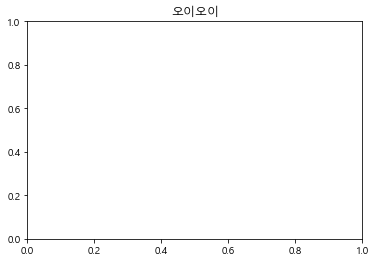

In [39]:
plt.rc('font', family='Malgun Gothic')
plt.title('오이오이')

# # # # ## # # # ## # # # ## # # # #

In [40]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

네트워크 그리기!

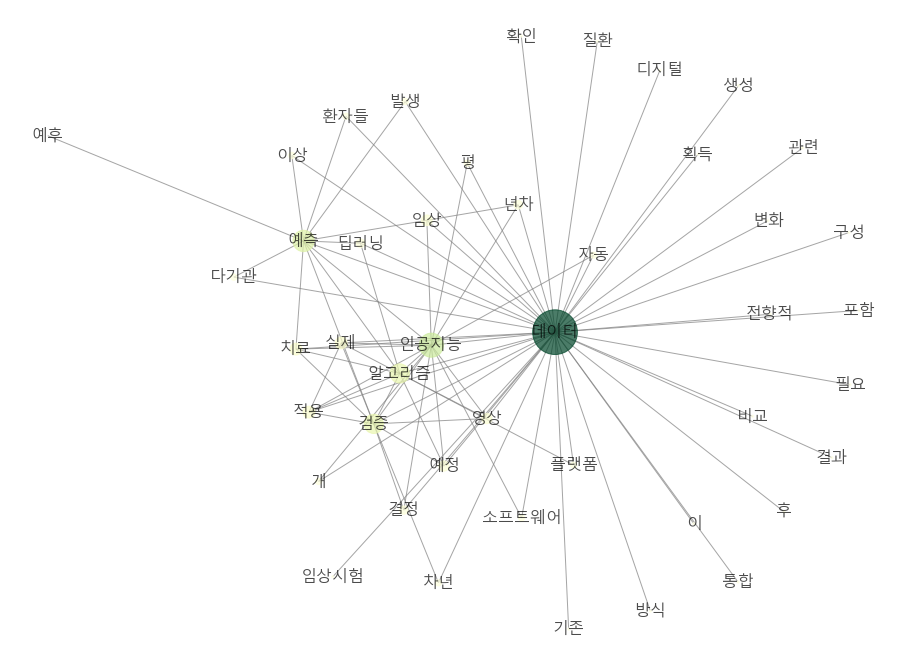

In [41]:
plt.figure(figsize=(16,12)); plt.axis('off')
pos = nx.spring_layout(G)

nx.draw_networkx(G, font_family='Malgun Gothic', font_size=16,
                pos=pos, node_color=list(pr.values()),node_size=nsize,
                alpha=0.7, edge_color='.5',cmap=plt.cm.YlGn)
plt.savefig('img.png',bbox_inches='tight')

* 분석결과 특정 주제를 찾아내기가 어려웠다.

* 빈도분석결과 주제 들 중 빈도수가 높은 치아, 호흡, 혈액, 투석 텍스트데이터셋에 대해 2차 분석을 진행 해야 함